In [1]:
from plot_service import *
from numpy import *

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
train_file = 'datasets/train.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('Data loaded!')

Data loaded!


In [3]:
def create_baseline_model():
    model = Sequential()
    model.add(Dense(250, input_dim=10, activation='relu'))
    model.add(Dense(125, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    
    return model

In [4]:
model = create_baseline_model()
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
preds = model.predict(X_test)

Train on 279216 samples, validate on 69804 samples
Epoch 1/10
279216/279216 [==============================] - 14s 50us/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 2/10
279216/279216 [==============================] - 14s 49us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 3/10
279216/279216 [==============================] - 13s 48us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 4/10
279216/279216 [==============================] - 13s 47us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 5/10
279216/279216 [==============================] - 14s 52us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/10
279216/279216 [==============================] - 15s 53us/step - loss: 0.0018 - mean_squ

In [5]:
pred = preds.reshape(len(preds))
real = y_test

plot_table(real, pred)

|     Real |   Predict |
|----------+-----------|
| 0.280669 | 0.293546  |
| 0.077872 | 0.115508  |
| 0.104906 | 0.136889  |
| 0.275276 | 0.278435  |
| 0.485488 | 0.469222  |
| 0.114552 | 0.150178  |
| 0.07531  | 0.0671882 |
| 0.034378 | 0.0482631 |
| 0.025761 | 0.0494302 |
| 0.138474 | 0.155072  |
| 0.09235  | 0.0768499 |
| 0.103453 | 0.120984  |
| 0.055177 | 0.0890442 |
| 0.054338 | 0.102124  |
| 0.124842 | 0.113777  |
| 0.706    | 0.528818  |
| 0.253669 | 0.251377  |
| 0.085852 | 0.124768  |
| 0.132435 | 0.153627  |
| 0.148348 | 0.164865  |
| 0.173093 | 0.198735  |
| 0.089478 | 0.107222  |
| 0.390088 | 0.417405  |
| 0.160668 | 0.151157  |
| 0.211254 | 0.194105  |
| 0.157654 | 0.170076  |
| 0.159079 | 0.147497  |
| 0.109328 | 0.127073  |
| 0.13916  | 0.122018  |
| 0.071529 | 0.098287  |
| 0.128429 | 0.14957   |
| 0.331388 | 0.347725  |
| 0.394787 | 0.382805  |
| 0.187083 | 0.13838   |
| 0.092121 | 0.0758749 |
| 0.067879 | 0.0386358 |
| 0.120067 | 0.131972  |
| 0.045427 | 0.0479088 |


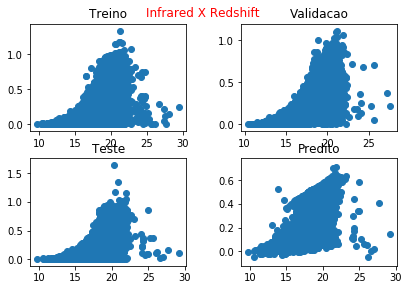

In [6]:
plot_scatter(X_train, y_train, X_val, y_val, X_test, y_test, preds, show_only=True)

### Adhafera:

![](redshift.png)

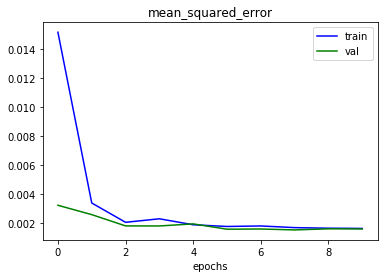

In [8]:
plot(hist.history, 'mean_squared_error', show_only=True)

### Adhafera:

![](mse.png)

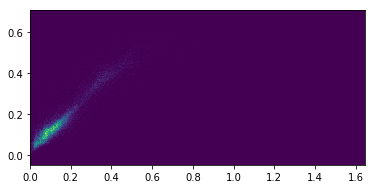

In [9]:
plot_hm(real, preds.T[0], show_only=True)

### Adhafera:

![](hm.png)